In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np
import glob 

In [2]:
deltat = '10S'

<AxesSubplot:xlabel='tiempo'>

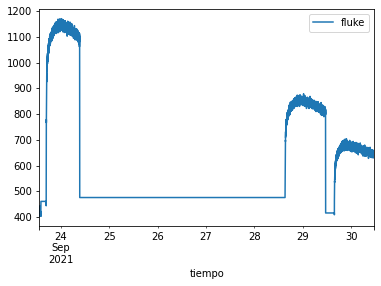

In [3]:
# archivo = "../../data/fluke_01-07-2021_05-07-2021.csv"
def importa_fluke(archivo):
    tmp = pd.read_csv(archivo,usecols=[7,11],names=["fluke","tiempo"],skiprows=1,encoding='iso-8859-1')
    tmp.tiempo = pd.to_datetime(tmp.tiempo,dayfirst=True)
    tmp.set_index("tiempo",inplace=True)
    tmp.fluke = tmp.fluke.str.replace(" ppm","")
    tmp.fluke = tmp.fluke.astype("float64")
    return tmp

fluke = glob.glob("../data/fluke_*.csv")
# print(fluke)
fluke = pd.concat([importa_fluke(archivo) for archivo in fluke],axis=0)
fluke.dropna(inplace=True,axis=0)
fluke.sort_index(inplace=True)
fluke   =   fluke.resample(deltat).bfill()
# fluke.to_csv("../data/Afluke.csv")
fluke.plot()
# fluke

<AxesSubplot:xlabel='ts'>

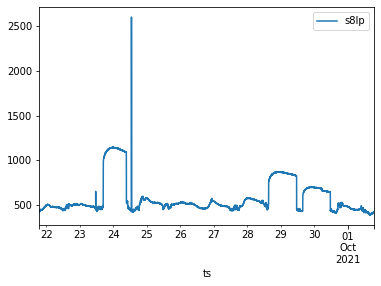

In [4]:
# s8lp = glob.glob("../data/s8lp*.csv")
s8lp = pd.read_csv("../data/S8LP.csv",index_col=0,parse_dates=True)
s8lp.dropna(inplace=True,axis=0)
s8lp.sort_index(inplace=True)
s8lp = s8lp.resample(deltat).bfill()
s8lp.plot()
# s8lp.to_csv("../data/As8lp.csv")
# s8lp.plot()

<AxesSubplot:xlabel='ts'>

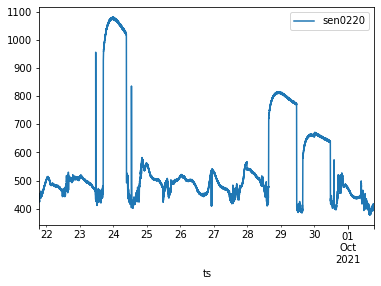

In [5]:
# sen0220 = glob.glob("../data/sen0220*")
# sen0220 = pd.concat([pd.read_csv(archivo,index_col=0,parse_dates=True) for archivo in sen0220],axis=0)
sen0220 = pd.read_csv("../data/SEN0220.csv",index_col=0,parse_dates=True)

# sen0220.drop_duplicates(subset=None, keep='first', inplace=True)
sen0220.dropna(inplace=True,axis=0)
sen0220 = sen0220.resample(deltat).bfill()

sen0220.sort_index(inplace=True)
# sen0220.to_csv("../data/Asen0220.csv")
sen0220.plot()

<AxesSubplot:xlabel='ts'>

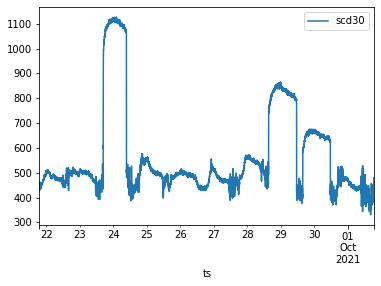

In [6]:
# scd30 = glob.glob("../data/scd30*")
# scd30 = pd.concat([pd.read_csv(archivo,index_col=0,parse_dates=True) for archivo in scd30],axis=0)
scd30 =  pd.read_csv("../data/SCD30.csv",index_col=0,parse_dates=True)
# scd30.drop_duplicates(subset=None, keep='first', inplace=True)
scd30.dropna(inplace=True,axis=0)

scd30   =   scd30.resample(deltat).bfill()

scd30.plot()
# scd30.to_csv("../data/Ascd30.csv")

In [8]:
sensores = pd.concat([fluke,s8lp,sen0220,scd30],axis=1)
sensores.sort_index(inplace=True)
sensores.to_csv("../data/sensores.csv")
sensores

,fluke,s8lp,sen0220,scd30
2021-09-21 19:00:00,NaN,421.0,427.0,437.0
2021-09-21 19:00:10,NaN,421.0,427.0,438.0
2021-09-21 19:00:20,NaN,421.0,426.0,438.0
2021-09-21 19:00:30,NaN,422.0,425.0,438.0
2021-09-21 19:00:40,NaN,422.0,425.0,437.0
...,...,...,...,...
2021-10-01 18:59:10,NaN,410.0,401.0,409.0
2021-10-01 18:59:20,NaN,410.0,404.0,408.0
2021-10-01 18:59:30,NaN,411.0,406.0,408.0
2021-10-01 18:59:40,NaN,411.0,407.0,426.0


In [9]:
sensores = pd.read_csv("../data/sensores.csv",index_col=0,parse_dates=True)
sensores

,fluke,s8lp,sen0220,scd30
2021-09-21 19:00:00,NaN,421.0,427.0,437.0
2021-09-21 19:00:10,NaN,421.0,427.0,438.0
2021-09-21 19:00:20,NaN,421.0,426.0,438.0
2021-09-21 19:00:30,NaN,422.0,425.0,438.0
2021-09-21 19:00:40,NaN,422.0,425.0,437.0
...,...,...,...,...
2021-10-01 18:59:10,NaN,410.0,401.0,409.0
2021-10-01 18:59:20,NaN,410.0,404.0,408.0
2021-10-01 18:59:30,NaN,411.0,406.0,408.0
2021-10-01 18:59:40,NaN,411.0,407.0,426.0


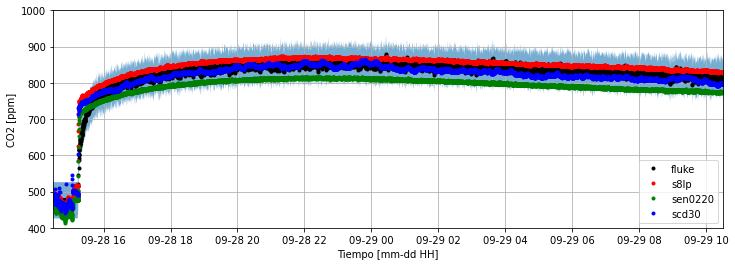

In [10]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse("2021-09-28 14:30") 
fecha2 = fecha1 + pd.Timedelta("20H")

ax.plot(sensores.fluke,"k.",label='fluke')
ax.plot(sensores.s8lp,"r.",label='s8lp')
ax.plot(sensores.sen0220,"g.",label='sen0220')
ax.plot(sensores.scd30,"b.",label='scd30')

fluke = sensores.fluke
fluke.dropna(axis=0,how="all",inplace=True)
ax.fill_between(fluke.index,fluke-50,fluke+50,alpha=.6)

ax.set_ylim(400,1000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("Tiempo [mm-dd HH]")
# ax.set_title("Mediciones CO2")
ax.legend()
ax.set_xlim(fecha1,fecha2)
ax.grid()

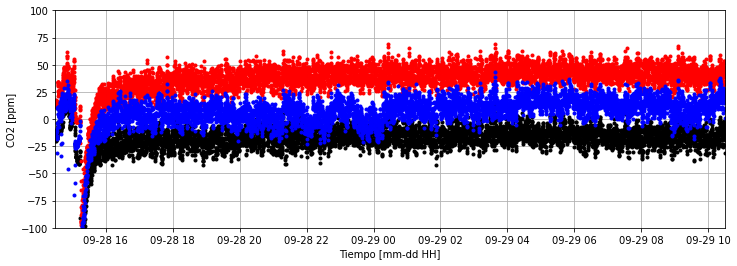

In [18]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse("2021-09-28 14:30") 
fecha2 = fecha1 + pd.Timedelta("20H")

ax.plot(sensores.fluke-sensores.s8lp,"k.",label='s8lp')
ax.plot(sensores.fluke-sensores.sen0220,"r.",label='sen0220')
ax.plot(sensores.fluke-sensores.scd30,"b.",label='scd30')
# ax.plot(sensores.s8lp,"r.",label='s8lp')
# ax.plot(sensores.sen0220,"g.",label='sen0220')
# ax.plot(sensores.scd30,"b.",label='scd30')

# fluke = sensores.fluke
# fluke.dropna(axis=0,how="all",inplace=True)
# ax.fill_between(fluke.index,fluke-50,fluke+50,alpha=1.0)

ax.set_ylim(-100,100)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("Tiempo [mm-dd HH]")
# ax.set_title("Mediciones CO2")
# ax.legend()
ax.set_xlim(fecha1,fecha2)
ax.grid()